In [2]:
import pymysql

In [3]:
dbCon = pymysql.connect(host='@@@.@@@.@@.@@@',
                        user='root',
                        password='@@@@@',
                        db='kocowa')
cursor = dbCon.cursor()

In [4]:
with dbCon:
    cursor.execute("""
        SELECT *
        FROM (SELECT *
        FROM(SELECT id,member_no,url_desc,ACTION,log_date, 
        CASE 
        WHEN url_desc LIKE '%http://223.194.46.212:8730/photo_video_detail%' then timestampdiff(second, log_date, LEAD(log_date) over (PARTITION BY action ORDER BY log_date,member_no))
        WHEN url_desc LIKE '%http://223.194.46.212:8730/drama/video_detail%' then timestampdiff(second, log_date, LEAD(log_date) over (PARTITION BY action ORDER BY log_date,member_no)) 
        ELSE 0 END AS "videoStayDuration" 
        from weblog WHERE ACTION = 'load') AS A
        WHERE A.url_desc LIKE '%http://223.194.46.212:8730/photo_video_detail%' OR A.url_desc LIKE '%http://223.194.46.212:8730/drama/video_detail%') AS video_log, 
        (SELECT title,photo_video_time AS video_time,photo_url_desc AS video_url_desc  FROM photo_photo
        UNION ALL 
        SELECT title,drama_video_time AS video_time,drama_url_desc AS video_url_desc FROM drama_drama) AS video
        WHERE video_log.url_desc = video.video_url_desc ORDER BY video_log.log_date, video_log.member_no
    """)
    video_duration = cursor.fetchall()
    
    cursor.execute("""
        SELECT title FROM photo_photo
        UNION ALL 
        SELECT title FROM drama_drama
    """)
    video_title = cursor.fetchall()

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(list(video_duration))
df

,0,1,2,3,4,5,6,7,8
0,416,1,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 21:43:15,8,Phoenix 2020,00:10:01,http://223.194.46.212:8730/photo_video_detail/...
1,451,19,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 21:53:02,63,Begin Again Episode 1,00:34:19,http://223.194.46.212:8730/photo_video_detail/...
2,539,24,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 23:14:13,82,Business Trip ShipOhYa,00:01:10,http://223.194.46.212:8730/photo_video_detail/...
3,571,24,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 23:18:01,123,Phoenix 2020,00:10:01,http://223.194.46.212:8730/photo_video_detail/...
4,583,24,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 23:20:20,77,Delayed Justice,00:01:09,http://223.194.46.212:8730/photo_video_detail/...
...,...,...,...,...,...,...,...,...,...
284,7055,22,http://223.194.46.212:8730/drama/video_detail/...,load,2021-04-09 16:36:43,66270,Dr Jin,00:03:53,http://223.194.46.212:8730/drama/video_detail/...
285,7088,27,http://223.194.46.212:8730/photo_video_detail/...,load,2021-04-10 11:02:51,1124,Friends Song Episode 1,00:12:34,http://223.194.46.212:8730/photo_video_detail/...
286,7112,27,http://223.194.46.212:8730/drama/video_detail/...,load,2021-04-10 12:01:04,930,Friend our Legend,00:12:07,http://223.194.46.212:8730/drama/video_detail/...
287,7188,0,http://223.194.46.212:8730/photo_video_detail/...,load,2021-04-12 11:14:59,18,Mr Queen,00:19:26,http://223.194.46.212:8730/photo_video_detail/...


In [7]:
df.columns = ['id','member_no','url','action','log_date','videoStayDuration','title','video_time','video_url']
df

,id,member_no,url,action,log_date,videoStayDuration,title,video_time,video_url
0,416,1,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 21:43:15,8,Phoenix 2020,00:10:01,http://223.194.46.212:8730/photo_video_detail/...
1,451,19,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 21:53:02,63,Begin Again Episode 1,00:34:19,http://223.194.46.212:8730/photo_video_detail/...
2,539,24,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 23:14:13,82,Business Trip ShipOhYa,00:01:10,http://223.194.46.212:8730/photo_video_detail/...
3,571,24,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 23:18:01,123,Phoenix 2020,00:10:01,http://223.194.46.212:8730/photo_video_detail/...
4,583,24,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 23:20:20,77,Delayed Justice,00:01:09,http://223.194.46.212:8730/photo_video_detail/...
...,...,...,...,...,...,...,...,...,...
284,7055,22,http://223.194.46.212:8730/drama/video_detail/...,load,2021-04-09 16:36:43,66270,Dr Jin,00:03:53,http://223.194.46.212:8730/drama/video_detail/...
285,7088,27,http://223.194.46.212:8730/photo_video_detail/...,load,2021-04-10 11:02:51,1124,Friends Song Episode 1,00:12:34,http://223.194.46.212:8730/photo_video_detail/...
286,7112,27,http://223.194.46.212:8730/drama/video_detail/...,load,2021-04-10 12:01:04,930,Friend our Legend,00:12:07,http://223.194.46.212:8730/drama/video_detail/...
287,7188,0,http://223.194.46.212:8730/photo_video_detail/...,load,2021-04-12 11:14:59,18,Mr Queen,00:19:26,http://223.194.46.212:8730/photo_video_detail/...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   id                 289 non-null    int64          
 1   member_no          289 non-null    int64          
 2   url                289 non-null    object         
 3   action             289 non-null    object         
 4   log_date           289 non-null    datetime64[ns] 
 5   videoStayDuration  289 non-null    int64          
 6   title              289 non-null    object         
 7   video_time         286 non-null    timedelta64[ns]
 8   video_url          289 non-null    object         
dtypes: datetime64[ns](1), int64(3), object(4), timedelta64[ns](1)
memory usage: 20.4+ KB


In [9]:
df['video_time'] = df['video_time'].apply(lambda x: x.seconds)
df['videoStayDuration'] = df['videoStayDuration'].astype(float)

In [10]:
df['videoStayDuration']

0          8.0
1         63.0
2         82.0
3        123.0
4         77.0
        ...   
284    66270.0
285     1124.0
286      930.0
287       18.0
288     1042.0
Name: videoStayDuration, Length: 289, dtype: float64

In [11]:
df.isna().sum()

id                   0
member_no            0
url                  0
action               0
log_date             0
videoStayDuration    0
title                0
video_time           3
video_url            0
dtype: int64

시청시간 없는거 유튜브에서 직접 가져오깅!

In [12]:
df['rating'] = df['videoStayDuration'] / df['video_time'] 

# rating이 inf인거 제거
# 2 이하인거는 1로 만들고, 2 이상인거는 보다가 잠든거 or 보다가 지루해진거 or 로그아웃 안하고 끈것 or
# 간주하고 1) 1로 만들기, 2) 0으로 만들기(sum하면 안더해짐, 만족도가 0이라하면 위험), 3) NaN으로 만들기, 
# 4) 0.5정도로 만들기 (근거:만족도가 높은지 낮은지를 알 수 없기 때문에 0과 1 중간값인 0.5로 설정) <=우선 4번으로 결정!!!!!!!!!

In [13]:
#평점 계산 (시청완료율)
df['rating'] = df['videoStayDuration'] / df['video_time'] 
# 페이지에서 너무 오래 머무른거는 제외

#이런식으로 너무 오래 머문 페이지에 대한 결과를 처리해야할 듯
#outlier에 대한 고민이 필요

# 시청완료율과 좋아요 수를 계산하는 식(예: a = 0.8, W(특정 컨텐츠에 대한 평점) = a * 시청 완료율 + (1-a) * 좋아요 => 0에서 1사이) 


In [14]:
df['rating'] = round(df['rating'],4)
df

,id,member_no,url,action,log_date,videoStayDuration,title,video_time,video_url,rating
0,416,1,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 21:43:15,8.0,Phoenix 2020,601.0,http://223.194.46.212:8730/photo_video_detail/...,0.0133
1,451,19,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 21:53:02,63.0,Begin Again Episode 1,2059.0,http://223.194.46.212:8730/photo_video_detail/...,0.0306
2,539,24,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 23:14:13,82.0,Business Trip ShipOhYa,70.0,http://223.194.46.212:8730/photo_video_detail/...,1.1714
3,571,24,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 23:18:01,123.0,Phoenix 2020,601.0,http://223.194.46.212:8730/photo_video_detail/...,0.2047
4,583,24,http://223.194.46.212:8730/photo_video_detail/...,load,2021-03-19 23:20:20,77.0,Delayed Justice,69.0,http://223.194.46.212:8730/photo_video_detail/...,1.1159
...,...,...,...,...,...,...,...,...,...,...
284,7055,22,http://223.194.46.212:8730/drama/video_detail/...,load,2021-04-09 16:36:43,66270.0,Dr Jin,233.0,http://223.194.46.212:8730/drama/video_detail/...,284.4206
285,7088,27,http://223.194.46.212:8730/photo_video_detail/...,load,2021-04-10 11:02:51,1124.0,Friends Song Episode 1,754.0,http://223.194.46.212:8730/photo_video_detail/...,1.4907
286,7112,27,http://223.194.46.212:8730/drama/video_detail/...,load,2021-04-10 12:01:04,930.0,Friend our Legend,727.0,http://223.194.46.212:8730/drama/video_detail/...,1.2792
287,7188,0,http://223.194.46.212:8730/photo_video_detail/...,load,2021-04-12 11:14:59,18.0,Mr Queen,1166.0,http://223.194.46.212:8730/photo_video_detail/...,0.0154


In [15]:
# 문제점 : 한 사람이 한 컨텐츠를 여러 번 보면 가장 마지막 것으로 된다.
# => 가장 큰 수로(max) or 합(sum)
# 합한 후 scaling 필요할지 고민...
df2 = df[['member_no','title','rating']].groupby(['member_no','title']).sum().reset_index()
df2

,member_no,title,rating
0,0,Because This is My First Life,0.0182
1,0,Capital Scandal,0.0583
2,0,Cheat On Me If You Can,0.2083
3,0,Delayed Justice,0.1304
4,0,Different Dreams,0.0489
...,...,...,...
241,28,Splash Splash Love,3.6412
242,28,The Penthouse,inf
243,28,The return of Superman,inf
244,29,Begin Again Episode 1,0.0087


In [21]:
# 연관규칙분석의 경우 모든 데이터가 1이나 0값을 가져야하므로 시청완료율이 0.5를 넘으면 1로 설정
df2.loc[df2['rating'] >=0.5, 'rating']= 1
df2.loc[df2['rating'] <0.5, 'rating']= 0 

In [22]:
#user들의 컨텐츠 평점 테이블
df2_matrix = df2.pivot_table('rating',index='member_no',columns='title')
#df2_matrix = df2_matrix.fillna(0)
df2_matrix

title,365,A Familiar Wife,Abyss,Be Melodramatic,Because This is My First Life,Begin Again Episode 1,Begin Again Episode 2,Begin Again Episode 3,Business Trip ShipOhYa,Capital Scandal,...,The Penthouse,The Tale of Nokdu,The return of Superman,Tomorrow With You,Twinkle Twinkle Episode 1,Twinkle Twinkle Episode 2,W,Witches,XX,YuHuiyeols Sketchbook
member_no,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
19,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
22,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
23,1.0,NaN,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
24,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,1.0,1.0,...,NaN,0.0,NaN,NaN,1.0,NaN,0.0,0.0,0.0,NaN


In [23]:
# 각 column마다 평균내기
df2_matrix.mean().sort_values(ascending =False)[:72]

title
YuHuiyeols Sketchbook        1.0
SISYPHUS THE MYTH            1.0
Friends Song Episode 2       1.0
Gagya Episode 3              1.0
Twinkle Twinkle Episode 1    1.0
                            ... 
Mr Queen                     0.0
Gagya Episode 1              0.0
The Tale of Nokdu            0.0
Witches                      0.0
Home Alone                   0.0
Length: 72, dtype: float64

In [24]:
df2_matrix = df2_matrix.fillna(0)
df2 = pd.DataFrame(df2_matrix)
df2

title,365,A Familiar Wife,Abyss,Be Melodramatic,Because This is My First Life,Begin Again Episode 1,Begin Again Episode 2,Begin Again Episode 3,Business Trip ShipOhYa,Capital Scandal,...,The Penthouse,The Tale of Nokdu,The return of Superman,Tomorrow With You,Twinkle Twinkle Episode 1,Twinkle Twinkle Episode 2,W,Witches,XX,YuHuiyeols Sketchbook
member_no,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
23,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [25]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
from IPython.display import Image

In [26]:
# min_sup: 최소 지지도 (Min. Support)
for i, min_sup in enumerate([0.1, 0.2]):
    freq_items = apriori(df2, min_support=min_sup, use_colnames=True, max_len=None, verbose=0, low_memory=False)
    print(freq_items)
    print("\n")

      support                                           itemsets
0    0.214286                                              (365)
1    0.142857                                  (A Familiar Wife)
2    0.214286                                  (Be Melodramatic)
3    0.214286                            (Begin Again Episode 1)
4    0.285714                            (Begin Again Episode 2)
..        ...                                                ...
721  0.142857  (XX, Homemade Love Story, Nine-Times Time Trav...
722  0.142857  (XX, Nine-Times Time Travel, Mystic Pop-up Bar...
723  0.142857  (XX, Homemade Love Story, Nine-Times Time Trav...
724  0.142857  (XX, Homemade Love Story, Nine-Times Time Trav...
725  0.142857  (XX, Homemade Love Story, Nine-Times Time Trav...

[726 rows x 2 columns]


     support                                     itemsets
0   0.214286                                        (365)
1   0.214286                            (Be Melodramatic)
2   0.214286        

In [28]:
freq_items = apriori(df2, min_support=0.2, use_colnames=True, max_len=None, verbose=0, low_memory=False)

print("규칙 수: ", len(freq_items),"\n")
print(freq_items)

규칙 수:  20 

     support                                     itemsets
0   0.214286                                        (365)
1   0.214286                            (Be Melodramatic)
2   0.214286                      (Begin Again Episode 1)
3   0.285714                      (Begin Again Episode 2)
4   0.214286                 (Comedy Big League Episode3)
5   0.214286                                (Dinner mate)
6   0.214286                         (High Kick Season 1)
7   0.285714                        (Homemade Love Story)
8   0.214286                            (How do you play)
9   0.214286                     (Nine-Times Time Travel)
10  0.285714                                (Oh My Ghost)
11  0.214286                                (Running Man)
12  0.214286                       (Sing Again Episode 1)
13  0.214286                   (365, Homemade Love Story)
14  0.214286  (High Kick Season 1, Begin Again Episode 2)
15  0.214286     (Begin Again Episode 2, How do you play)
16

In [32]:
# mining results

rules = association_rules(freq_items, metric="confidence", min_threshold=0.55)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(365),(Homemade Love Story),0.214286,0.285714,0.214286,1.00,3.500000,0.153061,inf
1,(Homemade Love Story),(365),0.285714,0.214286,0.214286,0.75,3.500000,0.153061,3.142857
2,(High Kick Season 1),(Begin Again Episode 2),0.214286,0.285714,0.214286,1.00,3.500000,0.153061,inf
3,(Begin Again Episode 2),(High Kick Season 1),0.285714,0.214286,0.214286,0.75,3.500000,0.153061,3.142857
4,(Begin Again Episode 2),(How do you play),0.285714,0.214286,0.214286,0.75,3.500000,0.153061,3.142857
5,(How do you play),(Begin Again Episode 2),0.214286,0.285714,0.214286,1.00,3.500000,0.153061,inf
6,(Homemade Love Story),(Dinner mate),0.285714,0.214286,0.214286,0.75,3.500000,0.153061,3.142857
7,(Dinner mate),(Homemade Love Story),0.214286,0.285714,0.214286,1.00,3.500000,0.153061,inf
8,(Homemade Love Story),(Oh My Ghost),0.285714,0.285714,0.214286,0.75,2.625000,0.132653,2.857143
9,(Oh My Ghost),(Homemade Love Story),0.285714,0.285714,0.214286,0.75,2.625000,0.132653,2.857143


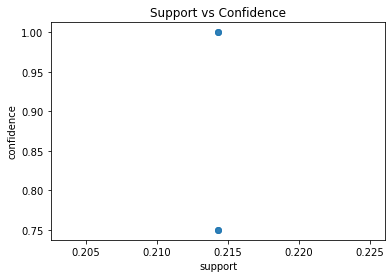

In [33]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.3) # X축, Y축의 값, 그리고 alpha는 색의 투명도
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [34]:
rules2 = association_rules(freq_items, metric="lift", min_threshold=1.35)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(365),(Homemade Love Story),0.214286,0.285714,0.214286,1.00,3.500000,0.153061,inf
1,(Homemade Love Story),(365),0.285714,0.214286,0.214286,0.75,3.500000,0.153061,3.142857
2,(High Kick Season 1),(Begin Again Episode 2),0.214286,0.285714,0.214286,1.00,3.500000,0.153061,inf
3,(Begin Again Episode 2),(High Kick Season 1),0.285714,0.214286,0.214286,0.75,3.500000,0.153061,3.142857
4,(Begin Again Episode 2),(How do you play),0.285714,0.214286,0.214286,0.75,3.500000,0.153061,3.142857
5,(How do you play),(Begin Again Episode 2),0.214286,0.285714,0.214286,1.00,3.500000,0.153061,inf
6,(Homemade Love Story),(Dinner mate),0.285714,0.214286,0.214286,0.75,3.500000,0.153061,3.142857
7,(Dinner mate),(Homemade Love Story),0.214286,0.285714,0.214286,1.00,3.500000,0.153061,inf
8,(Homemade Love Story),(Oh My Ghost),0.285714,0.285714,0.214286,0.75,2.625000,0.132653,2.857143
9,(Oh My Ghost),(Homemade Love Story),0.285714,0.285714,0.214286,0.75,2.625000,0.132653,2.857143


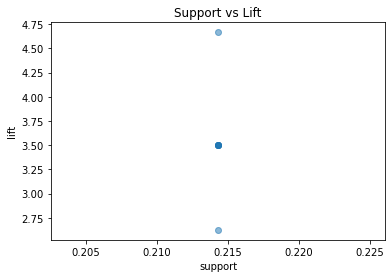

In [35]:
plt.scatter(rules['support'], rules['lift'], alpha=0.3)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

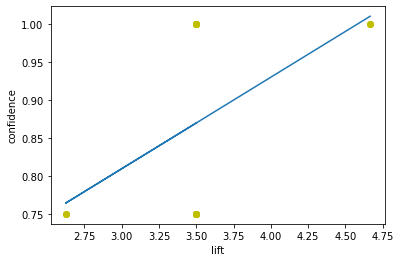

In [37]:
import numpy as np
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))